<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
import numpy as np

def sum_prod(X, V):
    result = np.zeros((X[0].shape[0], 1))
    for x, v in zip(X, V):
        if x.shape[1] == v.shape[0]:
            multiplication = np.dot(x, v)
            result += multiplication
        else:
            raise ValueError('Количество столбцов матрицы не равно количеству строк вектора')
    return result

def tests_sum_prod():
    assert np.array_equal(sum_prod([np.array([[0, 0], [0, 0]]), np.array([[0, 0], [0, 0]])], 
            [np.array([[0], [0]]), np.array([[0], [0]])]), np.array([[0], [0]])), 'Тест не пройден'
    
    assert np.array_equal(sum_prod([np.eye(5), np.eye(5)], 
            [np.ones((5, 1)), np.ones((5, 1))]), np.array([[2], [2], [2], [2], [2]])), 'Тест не пройден'
    
    assert np.array_equal(sum_prod([np.array([[4, 2], [7, 6]]), np.array([[1, 4], [1, 8]])], 
            [np.array([[2], [1]]), np.array([[7], [1]])]), np.array([[21], [35]])), 'Тест не пройден'

    assert np.array_equal(sum_prod([np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])], 
            [np.array([[1], [1]]), np.array([[1], [1]])]), np.array([[14], [22]])), 'Тест не пройден'
    
tests_sum_prod()



<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
def binarize(M, threshold=0.5):
    return [[1 if m > threshold else 0 for m in row] for row in M]

def tests_binarize():
    M1 = [
        [0.1, 2, 0.3],
        [7, 0.4, 0.1],
        [0.5, 0.2, 8]
    ]
    result1 = [
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ]

    assert binarize(M1, 0.5) == result1, 'Тест не пройден'

    M2 = [
        [0, 0.8, 0.4],
        [0.6, 0.3, 0.9],
        [0.4, 1, 0.5]
    ]
    result2 = [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 1]
    ]

    assert binarize(M2, 0.4) == result2, 'Тест не пройден'

    M3 = [
        [-1, 0.9],
        [2, -0.9]
    ]
    result3 = [
        [0, 1],
        [1, 0]
    ]

    assert binarize(M3, 0) == result3, "Test 4 Failed"

    M4 = [
        [0, 0.8, 0.4],
        [1, 0.3, 1],
        [0.4, 0.8, 0.5],
        [0.7, 1, 0.5]
    ]
    result4 = [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
        [1, 1, 0]
    ]

    assert binarize(M4, 0.6) == result4, 'Тест не пройден'

tests_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def unique_rows(mat):
    return [list(set(row)) for row in mat]

def unique_columns(mat):
    transported = list(zip(*mat))
    return [list(set(columns)) for columns in transported]
    
def tests_unique_rows_and_columns():
    mat1 = [
        [7, 1, 2, 8],
        [4, 4, 7, 5],
        [3, 4, 7, 8]
    ]
    result_rows1 = [
        [7, 1, 2, 8],  
        [4, 7, 5],     
        [3, 4, 7, 8]   
    ]
    result_columns1 = [
        [7, 4, 3],     
        [1, 4],       
        [2, 7],        
        [8, 5]         
    ]
    assert unique_rows(mat1) == result_rows1, 'Тест не пройден'
    assert unique_rows(mat1) == result_columns1, 'Тест не пройден'

    mat2 = [
        [-1, -2, -1],
        [-3, 7, -3],
        [-1, -4, -1]
    ]
    result_rows3 = [
        [-1, -2],  
        [-3],  
        [-1, -4] 
    ]
    result_columns3 = [
        [-1, -3],  
        [-2],      
        [-1, -3]  
    ]
    assert unique_rows(mat2) == result_rows3, 'Тест не пройден'
    assert unique_columns(mat2) == result_columns3, 'Тест не пройден'

    mat3 = [
        [4],
        [5],
        [5]
    ]
    result_rows4 = [
        [4],  
        [5],
        [5]
    ]
    result_columns4 = [
        [4]
        [5]  
    ]
    assert unique_rows(mat3) == result_rows4, 'Тест не пройден'
    assert unique_columns(mat3) == result_columns4, 'Тест не пройден'


 <h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def generate_matrix_and_analyze(m, n, standart_deviation = 1, math_mean = 0):
    matrix = np.random.normal(loc=math_mean, scale=standart_deviation, size=(m, n))
    
    row_mean = np.mean(matrix, axis = 1) 
    col_mean = np.mean(matrix, axis = 0)
    row_variance = np.var(matrix, axis = 1)   
    col_variance = np.var(matrix, axis = 0)
    
    print("Математическое ожидание по строкам: ", row_mean)
    print("Дисперсия по строкам: ", row_variance)
    print("Математическое ожидание по столбцам: ", col_mean)
    print("Дисперсия по столбцам: ", col_variance)
    
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins = 10, alpha = 1, color = 'red', edgecolor = 'black')
        plt.title(f'Гистограмма для строки {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins = 10, alpha = 1, color = 'blue', edgecolor = 'black')
        plt.title(f'Гистограмма для столбца {j + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
def chess(m, n, a, b):
    matrix = [[0] * n for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
                
    return matrix

def tests_chess():
    result1 = [
        [0, 1, 0, 1],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 1, 0]
    ]
    assert chess(4, 4, 0, 1) == result1, 'Тест не пройден'

    result2 = [
        [7, 8, 7, 8, 7],
        [8, 7, 8, 7, 8]
    ]
    assert chess(2, 5, 7, 8) == result2, 'Тест не пройден'

    result3 = [
        [0, -1]
    ]
    assert chess(1, 2, 0, -1) == result3, 'Тест не пройден'

    result4 = [
        [1, -1, 1],
        [-1, 1, -1],
        [1, -1, 1],
        [-1, 1, -1],
        [1, -1, 1],
        [-1, 1, -1]
    ]
    assert chess(6, 3, 1, -1) == result4, 'Тест не пройден'
  
    result5 = [
        [2, 3, 2, 3],
        [3, 2, 3, 2]
    ]
    assert chess(2, 4, 2, 3) == result5, 'Тест не пройден'

tests_chess()


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

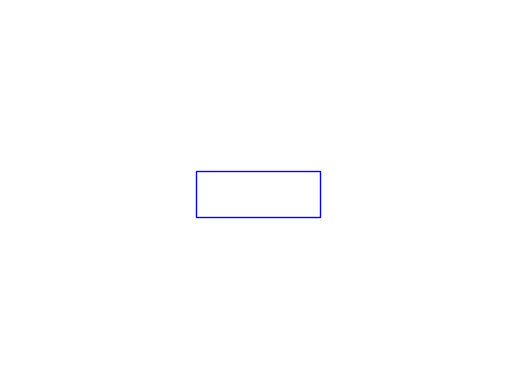

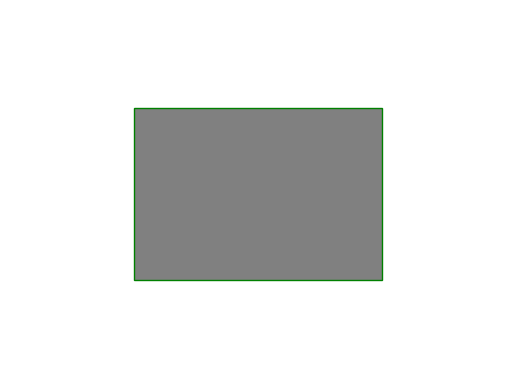

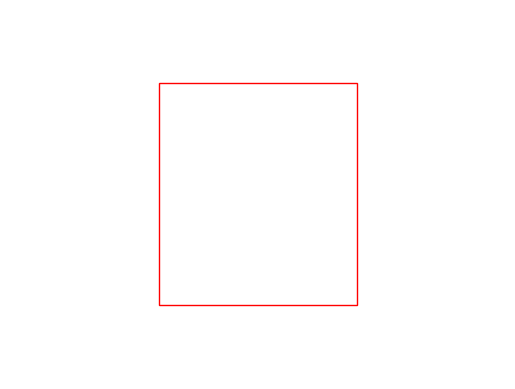

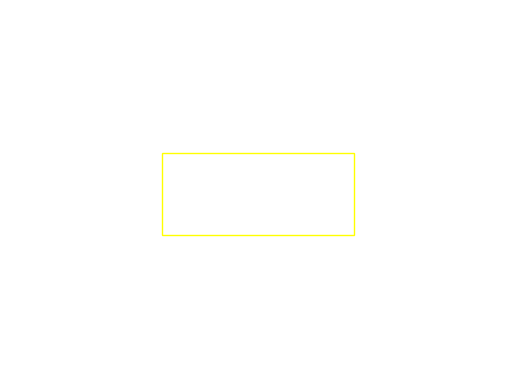

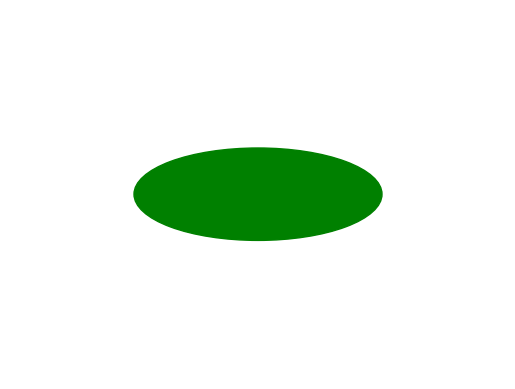

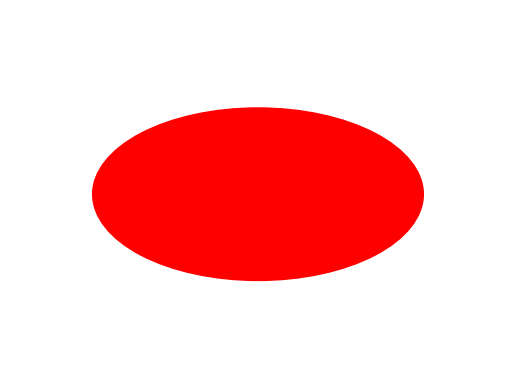

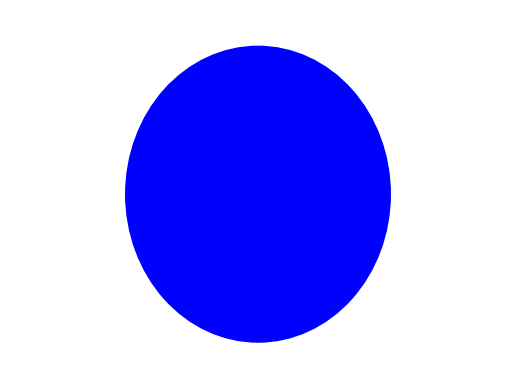

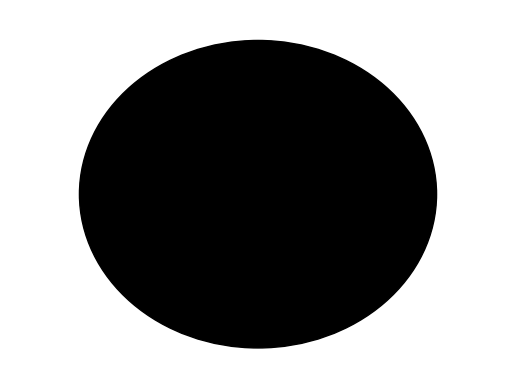

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    left = (m - a) / 2
    bottom = (n - b) / 2

    fig, ax = plt.subplots() 
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_facecolor(background_color)

    rectangle = patches.Rectangle((left, bottom), a, b, linewidth = 1, edgecolor = rectangle_color, facecolor = background_color)
    ax.add_patch(rectangle) 
    plt.axis('off')
    plt.show() 


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    x = m / 2
    y = n / 2

    fig, ax = plt.subplots()
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_facecolor(background_color)

    ellipse = patches.Ellipse((x, y), 2 * a, 2 * b, linewidth = 1, edgecolor = ellipse_color, facecolor = ellipse_color)
    ax.add_patch(ellipse)
    plt.axis('off')
    plt.show()

def test_draw_rectangle():
    draw_rectangle(50, 25, 200, 200, 'blue', 'white')
    draw_rectangle(100, 70, 200, 150, 'green', 'grey')
    draw_rectangle(60, 60, 150, 100, 'red', 'white')
    draw_rectangle(70, 40, 180, 180, 'yellow', 'white')

def test_draw_ellipse():
    draw_ellipse(50, 25, 200, 200, 'green', 'white')
    draw_ellipse(100, 70, 300, 300, 'red', 'white')
    draw_ellipse(80, 80, 300, 200, 'blue', 'white')
    draw_ellipse(54, 104, 150, 250, 'black', 'white')

test_draw_rectangle()
test_draw_ellipse()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [23]:
import numpy as np

def mean(series):
    return np.mean(series)

def variance(series):
    return np.var(series)

def standart_deviation(series):
    return np.std(series)

def extrema(series):
    maxima = np.where((series[1:-1] > series[:-2]) & (series[1:-1] > series[2:]))[0] + 1
    minima = np.where((series[1:-1] < series[:-2]) & (series[1:-1] < series[2:]))[0] + 1
    return maxima, minima

def moving_average(series, p):
    if p > len(series):
        return np.array([]) 
    return np.convolve(series, np.ones(p) / p, mode='valid')

def tests_mean():
    series = np.array([1, 2, 3, 4, 5])
    assert mean(series) == 3.0, 'Тест не пройден'

    series = np.array([10, 10, 10])
    assert mean(series) == 10.0, 'Тест не пройден'

    series = np.array([-1, -2, -3])
    assert mean(series) == -2.0, 'Тест не пройден'

    series = np.array([])
    assert np.isnan(mean(series)), 'Тест не пройден'

def tests_variance():
    series = np.array([5, 5, 5])
    assert variance(series) == 0.0, 'Тест не пройден'

    series = np.array([1, 2, 3, 4])
    assert np.isclose(variance(series), 1.25), 'Тест не пройден'

    series = np.array([])
    assert np.isnan(variance(series)), 'Тест не пройден'

def tests_standart_deviation():
    series = np.array([1, 1, 1])
    assert standart_deviation(series) == 0.0, 'Тест не пройден'

    series = np.array([1, 2, 3])
    assert np.isclose(standart_deviation(series), 0.816496580927726, rtol=1e-9), 'Тест не пройден'

    series = np.array([])
    assert np.isnan(standart_deviation(series)), 'Тест не пройден'

def tests_extrema():
    series = np.array([4, 4, 4])
    maxima, minima = extrema(series)
    assert len(maxima) == 0, 'Тест не пройден'
    assert len(minima) == 0, 'Тест не пройден'

def tests_moving_average():
    series = np.array([1, 2, 3, 4, 5])
    p = 2
    expected_result = np.array([1.5, 2.5, 3.5, 4.5])
    assert np.array_equal(moving_average(series, p), expected_result), 'Тест не пройден'
    p = 6
    assert np.array_equal(moving_average(series, p), np.array([])), 'Тест не пройден'
    
tests_mean()
tests_variance()
tests_standart_deviation()
tests_extrema()
tests_moving_average()

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [12]:
import numpy as np

def one_hot_encoding(vector):
    number_classes = np.max(vector) + 1
    one_hot_matrix = np.zeros((len(vector), number_classes))
    one_hot_matrix[np.arange(len(vector)), vector] = 1
    return one_hot_matrix

def tests_one_hot_encoding():
    vector = np.array([0, 2, 3, 0])
    expected_output = np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    assert np.array_equal(one_hot_encoding(vector), expected_output), 'Тест не пройден'

    vector = np.array([1, 1, 1, 1])
    expected_output = np.array([
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]
    ])
    assert np.array_equal(one_hot_encoding(vector), expected_output), 'Тест не пройден'

    vector = np.array([0, 1, 2, 3])
    expected_output = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    assert np.array_equal(one_hot_encoding(vector), expected_output), 'Тест не пройден'

    vector = np.array([2])
    expected_output = np.array([
        [0, 0, 1]
    ])
    assert np.array_equal(one_hot_encoding(vector), expected_output), 'Тест не пройден'

    vector = np.array([1, 0, 1, 2])
    expected_output = np.array([
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
    assert np.array_equal(one_hot_encoding(vector), expected_output), 'Тест не пройден'

tests_one_hot_encoding()